# Day 4: Classify All the Things!!

## IMBD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
imdb = pd.read_csv("data/movie_metadata.csv")
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


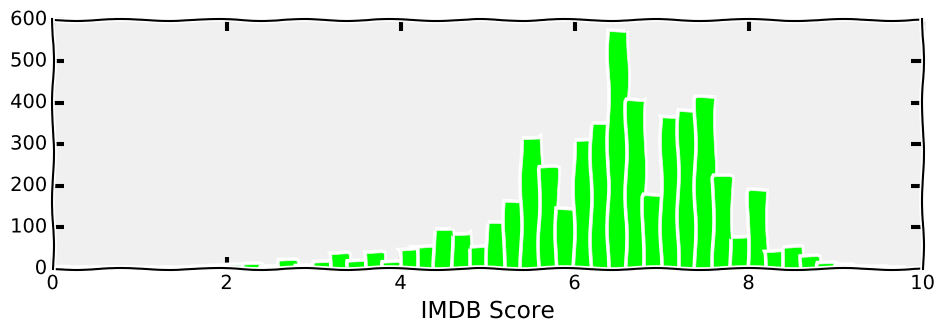

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [11]:
data = imdb.imdb_score
plt.xkcd()
plt.figure(figsize=(10, 3))
plt.hist(data, bins=np.arange(0, 10, .2), color='#00ff00')
plt.xlabel("IMDB Score")
plt.show()
data.describe()

### Creating New Class based on score
- Class 0: imdb_score < 6.5
- Class 1: 6.5 ≤ imdb_score < 7.5
- Class 2: imdb_score ≥ 7.5

In [4]:
def imdb_class(x):
    """Return the Class (0,1,2) based on imdb_score"""
    if x.imdb_score < 6.5:
        return 0
    elif 6.5 <= x.imdb_score < 7.5:
        return 1
    else:
        return 2
    
imdb['cat'] = [imdb_class(imdb.loc[i]) for i in range(len(imdb))]

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


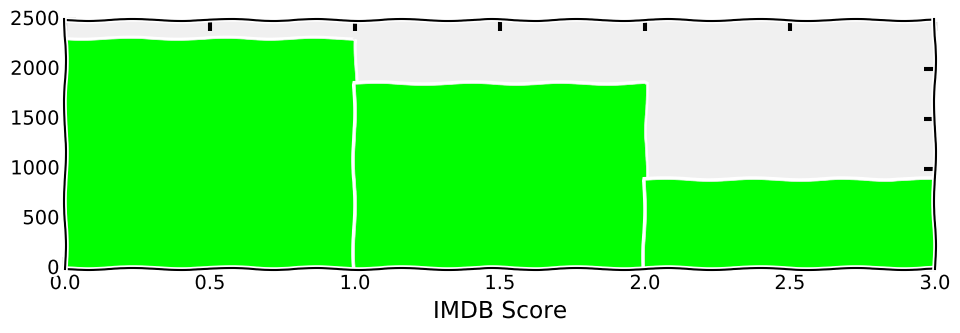

count    5043.000000
mean        0.719810
std         0.744022
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: cat, dtype: float64

In [12]:
data = imdb.cat
plt.xkcd()
plt.figure(figsize=(10, 3))
plt.hist(data, bins=np.arange(0, 4, 1), color='#00ff00')
plt.xlabel("IMDB Score")
plt.show()
data.describe()

In [6]:
sum(pd.isnull(imdb.cat))

0

## rescale data
Rescaling Director Likes on Facebook and Gross

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'cat'],
      dtype='object')

In [9]:
sum(pd.isnull(imdb.imdb_score))

0

In [10]:
def fill_dfl(x):
    """Fill in the nans for Director Likes on Facebook"""
    if pd.isnull(x.director_facebook_likes):
        return 0      
    else:
        return x.director_facebook_likes

imdb.director_facebook_likes = [fill_dfl(imdb.loc[i]) for i in range(len(imdb))]
imdb["director_facebook_likes_scaled"] = scaler.fit_transform(imdb.director_facebook_likes.values.reshape(-1, 1))
    
    
def fill_gross(x):
    """Fill in the nans for Director Likes on Facebook"""
    if pd.isnull(x.gross):
        return 0      
    else:
        return x.gross

imdb.gross = [fill_dfl(imdb.loc[i]) for i in range(len(imdb))]
imdb["gross_scaled"] = scaler.fit_transform(imdb.gross.values.reshape(-1, 1))

def fill_nan(x, columns):
    """Fill the nans with 0 for any column"""
    if pd.isnull(x[columns]):
        return 0
    else:
        return x[columns]
    
imdb.
    

SyntaxError: invalid syntax (<ipython-input-10-c2586b30f0ec>, line 29)

In [ ]:
# imdb.gross_scaled.describe()

## K-Nearest Neighboors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
clf.fit(imdb[["gross_scaled", "director_facebook_likes_scaled"]], imdb.cat)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Validating our Classifier: Accuracy Score

In [ ]:
clf = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(imdb[["gross_scaled", "director_facebook_likes_scaled"]], imdb.cat, test_size=0.33, random_state=4)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_model = clf.predict(X_test)
accuracy_score(y_test, y_model)

### Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(imdb):
    X_train = imdb[["gross_scaled", "director_facebook_likes_scaled"]].loc[train_index]
    X_test = imdb[["gross_scaled", "director_facebook_likes_scaled"]].loc[test_index]

    y_train = imdb.cat.loc[train_index]
    y_test = imdb.cat.loc[test_index]

    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_model))

### Uber Validation

In [ ]:
len(imdb.director_facebook_likes_scaled)

In [ ]:
avg_accuracy = []

for k in range(1, 40):
    clf = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    kf = KFold(n_splits=5, shuffle=True)
    kf.get_n_splits(imdb)

    for train_index, test_index in kf.split(imdb):
        X_train = imdb[["gross_scaled", "director_facebook_likes_scaled"]].loc[train_index]
        X_test = imdb[["gross_scaled", "director_facebook_likes_scaled"]].loc[test_index]

        y_train = imdb.cat.loc[train_index]
        y_test = imdb.cat.loc[test_index]

        clf.fit(X_train, y_train)
        y_model = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_model))

    avg_accuracy.append(np.mean(accuracies))

print("Optimal Neighbors: {} with {}% accuracy".format(np.argmax(avg_accuracy) + 1, np.round(max(avg_accuracy), 4) * 100))